<a href="https://colab.research.google.com/github/Audrey-ai/KNN_and_Naive_Bayes_Classifier_Algorithms/blob/main/Naive_Bayes_Classifier_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#1. Defining the Question

###a) Specification of Data Analytical Question

The aim of this project is to implement a Naive Bayes classifier algorithm to a dataset to predict whether an email is spam or not based on a number of features.



###b) Determining the metric for success

The research will be considered a success if we are able to successfully implement a Naive Bayes classifier algorithm to a dataset to predict whether an email is spam or not based on a number of features.

###c) Understanding the context

Naive Bayes is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
Naive Bayes model is easy to build and particularly useful for very large data sets.

In our research we will apply the Naive Bayes Classifier algorithm to to predict whether an email is spam or not based on a number of features.

 

###d) Recording the Experimental Design

Experimental design refers to how variable measures are allocated to the different conditions in a reaserch or experiment. The experimental design used is Independent measures design, also known as between-groups,which is an experimental design where different variables are used in each condition of the independent variable. This means that each condition of the experiment includes a different group of variables.

###e) Data Relevance

The datasets we are using in our research are relevant as it contains information pertaining to different variables that would generally influence the prediction of whether an email is spam or not.In general the variables selected for the dataset present a high degree of data relevance.

#2. Reading and Checking of data

In [1]:
#Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
#Checking column names

with open('/content/spambase.names') as f:
    print(f.read())

In [9]:
#Loading the dataset that we will use in our research
#

Columns = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
       'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive',
       'word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free',
       'word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your',
       'word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl',
       'word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet',
       'word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology',
       'word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs',
       'word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu',
       'word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[',
       'char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest',
       'capital_run_length_total','Spam']


Data = pd.read_csv('spambase.csv',names=Columns)
Data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [10]:
#Checking the shape of the dataset
#

Data.shape

(4601, 58)

In [11]:
#Checking Column info
#

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [14]:
#Checking number of unique values per column
#

Data['Spam'].unique()

array([1, 0])

#3.Data Cleaning

In [17]:
#Checking for missing values
#

Data.isnull().sum().any()

#There are no missing values in the dataset

False

In [20]:
#Checking for duplicates
#

Data.duplicated().any().sum()  #There are duplicates

#Dropping duplicates
Data.drop_duplicates(inplace=True)

#Checking for any more duplicates
Data.duplicated().any().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


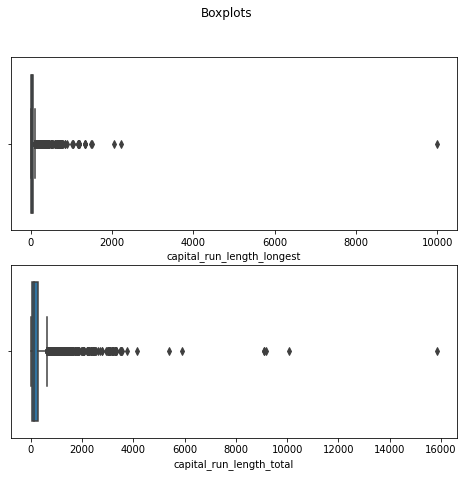

In [25]:
#Checking for Outliers and Anomalies
#

variables = ['capital_run_length_longest','capital_run_length_total']

fig, ax = plt.subplots(len(variables), figsize=(8,7))
fig.suptitle('Boxplots')

for i,col_val in enumerate(variables):
  sns.boxplot(Data[col_val],ax=ax[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


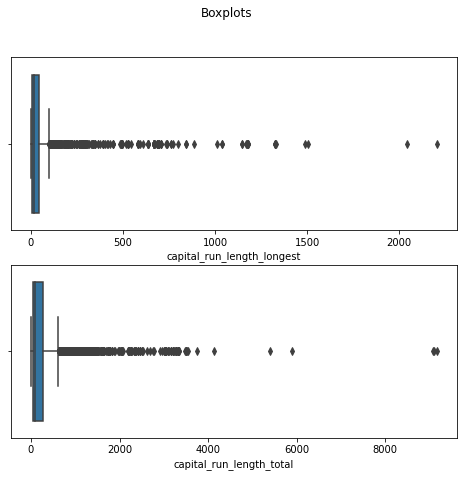

In [30]:
#Removing the extreme outliers in the
#capital_run_length_longest and capital_run_length_total columns

#Capital_run_length_longest outlier removal
Outlier1 = Data[Data['capital_run_length_longest'] > 6000] #There is one extreme outlier that we will drop
Outlier1

#Dropping the  outlier
Data.drop(Outlier1.index,inplace=True)


#Capital_run_length_total outlier removal
Outlier2 = Data[Data['capital_run_length_total'] > 12000] #There is one extreme outlier that we will drop
Outlier2

#Dropping the  outlier
Data.drop(Outlier2.index,inplace=True)


#Boxplot to check if outlier is removed
variables = ['capital_run_length_longest','capital_run_length_total']

fig, ax = plt.subplots(len(variables), figsize=(8,7))
fig.suptitle('Boxplots')

for i,col_val in enumerate(variables):
  sns.boxplot(Data[col_val],ax=ax[i])

#4.Exploratory Data Analysis

#4.a)Univariate Data Analysis

In [31]:
#Creating frequency tables for Spam categorical column

Data['Spam'].value_counts()

#Some of the things we notice from the below frequency tables are:
#Most emails are not spam

0    2531
1    1677
Name: Spam, dtype: int64

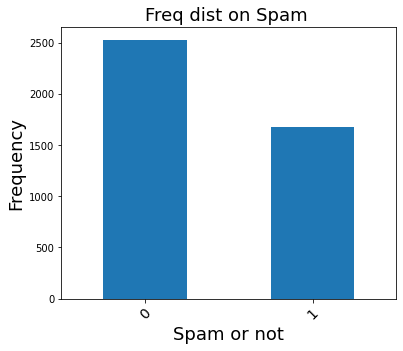

In [33]:
#Displaying whether or not an email has been predicted as spam
#
#Bar plot on spam

Data['Spam'].value_counts().plot.bar(figsize=(6,5),grid=False)

plt.title('Freq dist on Spam ',size=18)
plt.xlabel('Spam or not',size=18)
plt.xticks(fontsize=14,rotation=45)
plt.ylabel('Frequency',size=18)
plt.show()

#Most emails have been predicted as not spam

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


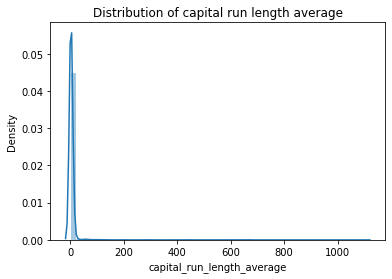

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


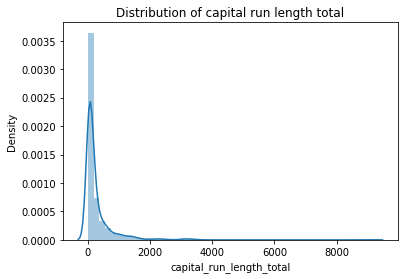

In [301]:
#Plotting distributions

sns.distplot(Data['capital_run_length_average'])
plt.title('Distribution of capital run length average')
plt.show()

#Plotting distributions
sns.distplot(Data['capital_run_length_total'])
plt.title('Distribution of capital run length total')
plt.show()


In [43]:
#Summary statistics on continuous variables
#

Data[Vars].describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000,4208.000000
mean,0.104370,0.112709,0.291521,0.063099,0.325475,0.096656,0.117531,0.108051,0.091904,0.248538,0.056668,0.565428,0.097702,0.061240,0.044824,0.253855,0.149225,0.188800,1.718909,0.085002,0.810335,0.131649,0.100670,0.091012,0.574268,0.279463,0.370014,0.128636,0.098429,0.103828,0.063574,0.044938,0.102381,0.045798,0.107933,0.099415,0.143550,0.014197,0.084097,0.061307,0.041452,0.141609,0.048795,0.085307,0.320276,0.189465,0.005789,0.034762,0.040177,0.141797,0.017384,0.280903,0.075668,0.045344,5.328956,49.785884,285.164686
std,0.300069,0.454361,0.515820,1.352808,0.687932,0.276088,0.397370,0.410373,0.282204,0.656772,0.184197,0.882661,0.309376,0.346145,0.242242,0.797713,0.457766,0.541254,1.768964,0.505700,1.149538,1.071509,0.351413,0.431821,1.676890,0.905747,1.775734,0.535549,0.576930,0.439667,0.387357,0.300818,0.569277,0.301882,0.530384,0.386556,0.424597,0.230567,0.448094,0.319593,0.318251,0.793986,0.231924,0.646247,1.046140,0.928519,0.079189,0.298591,0.252137,0.230869,0.105755,0.843287,0.238310,0.434987,32.957977,127.966855,550.192506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626750,7.000000,39.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

#4.b) Bivariate Data Analysis

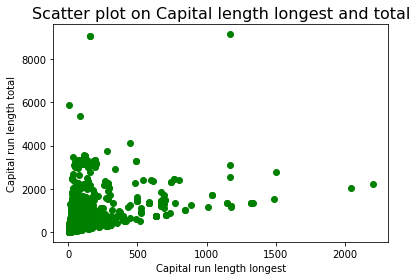

In [45]:
##Scatter plot to check the relationship between various variables

#Scatter plot to check on relation between capital_run_length longest and total
plt.scatter(Data['capital_run_length_longest'],Data['capital_run_length_total'], color='Green')
plt.title('Scatter plot on Capital length longest and total',size=16)
plt.xlabel('Capital run length longest',size=10)
plt.ylabel('Capital run length total',size=10)
plt.show()

#There seems to be a positive relation between the two variables

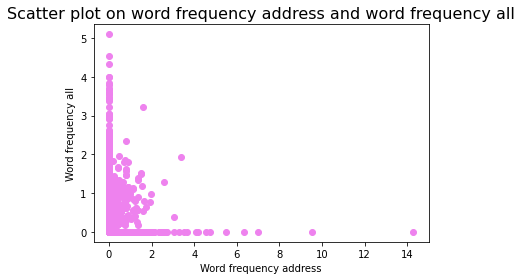

In [48]:
##Scatter plot to check the relationship between various variables
	
#Scatter plot to check on relation between word frequency address and word frequency all

plt.scatter(Data['word_freq_address'],Data['word_freq_all'], color='Violet')
plt.title('Scatter plot on word frequency address and word frequency all',size=16)
plt.xlabel('Word frequency address',size=10)
plt.ylabel('Word frequency all',size=10)
plt.show()

#There seems to be no visible relation between the two variables

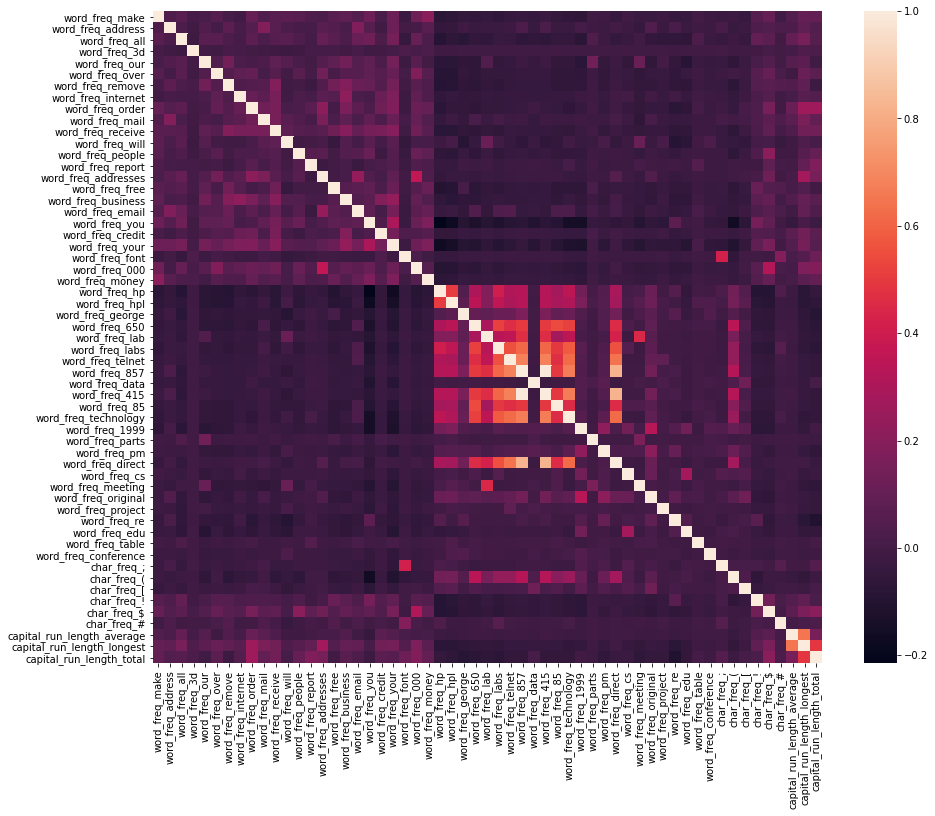

In [57]:
#Creating the correlation heatmap
#to check the relationship among a number of different variables

fig, ax = plt.subplots(figsize=(15,12))        
sns.heatmap(Data[Vars].corr(),annot=False,ax=ax)
plt.show()

#From the heatmap based on the colors we do notice most variables are not related
#but quite a number exhibit a positive correlation among them.

###**Checking and dropping highly correlated features**

In [115]:
#Dropping highly correlated features
#
#Creating a correlatiom matrix
#

corr_matrix = Data[Vars].corr().abs()
corr_matrix

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

#Drop marked  features 
Data.drop(Data[to_drop], axis=1)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


#4.c) Multivariate Data Analysis

Text(0.5, 1.0, 'Scatter plot on capital_run_length_longest and capital_run_length_total')

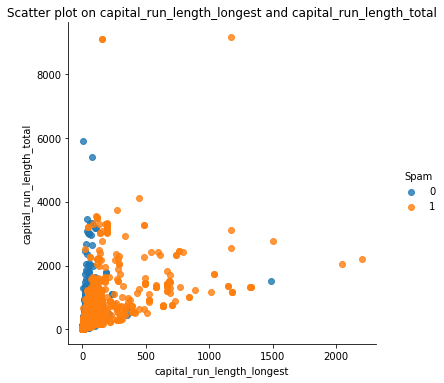

In [116]:
##Scatter plot to check the relationship between age and fare by survival status


sns.lmplot(x='capital_run_length_longest', y='capital_run_length_total',
           hue='Spam',data=Data,fit_reg=False)

plt.title('Scatter plot on capital_run_length_longest and capital_run_length_total')

###Principal Component Analysis(PCA)

In [261]:
#Creating features and label from our dataset
#

X = Data.drop(['Spam'],axis=1)
y = Data['Spam']

In [262]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

In [263]:
#Feature Scaling
#

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [264]:
#Implementing PCA with 4 Components
#

from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Since we have applied PCA to reduce the number of our features of our data we can now proceed to implementing the Naive Bayes Classifier Algorithm.

#5.Implementing the solution

#5.a) Solution Implementation with reduced Features using PCA

###**Naive Bayes Classifier:80-20 sets**

The dataset we reduced using PCA had an 80-20 split thus we will just proceed to implementing the solution using 80-20 sets.

In [265]:
# Training our model
# 
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [ ]:
#Making our predictions
#

y_pred1 = model.predict(X_test)
y_pred1

In [267]:
#Checking model performance
#

from sklearn.metrics import confusion_matrix,accuracy_score

print( accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8135391923990499
[[391 129]
 [ 28 294]]


We attained an accuracy of 81.35% using 80-20 sets.Let us proceed to 70-30 and 60-40 sets. 

###**Naive Bayes Classsifier:70-30 sets**

In [268]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) 

In [269]:
#Feature Scaling
#

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [270]:
#Implementing PCA with 4 Components
#

from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [271]:
# Training our model
# 
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [272]:
#Making our predictions
#

y_pred2 = model.predict(X_test)
y_pred2

array([0, 0, 1, ..., 1, 1, 1])

In [273]:
#Checking model performance
#

from sklearn.metrics import confusion_matrix,accuracy_score

print( accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.8194774346793349
[[577 188]
 [ 40 458]]


We attained an accuracy of 81.95% using 70-30 sets which is better than 80-20 sets.Let us proceed to 60-40 sets.

###**Naive Bayes Classifier:60-40 sets**

In [274]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [275]:
#Feature Scaling
#

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [276]:
#Implementing PCA with 4 Components
#

from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [277]:
# Training our model
# 
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [ ]:
#Making our predictions
#

y_pred3 = model.predict(X_test)
y_pred3

In [279]:
#Checking model performance
#

from sklearn.metrics import confusion_matrix,accuracy_score

print( accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.827790973871734
[[778 237]
 [ 53 616]]


We attained an accuracy of 82.78% using 60-40 sets which is slightly better than both 80-20 and 70-30 sets.

#5.b)Solution Implementation with all features of the dataset Inclusive

###**Naive Bayes Classifier:80-20 sets**

In [ ]:
#Creating features and label from our dataset
#

X = Data.drop(['Spam'],axis=1)
y = Data['Spam']

print(X)
print(y)

In [281]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

In [282]:
#Feature Scaling
#

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [283]:
# Training our model
# 
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [ ]:
#Making our predictions
#

y_pred11 = model.predict(X_test)
y_pred11

In [285]:
#Checking model performance
#

from sklearn.metrics import confusion_matrix,accuracy_score

print( accuracy_score(y_test, y_pred11))
print(confusion_matrix(y_test, y_pred11))

0.8111638954869359
[[377 143]
 [ 16 306]]


Using 80-20 sets we get an accuracy score of 81.12% which is good. Checking the model performance when using different sets(70-30 and 60-40).

###**Naive Bayes Classsifier:70-30 sets**

In [286]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5) 

In [287]:
#Feature Scaling
#

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [288]:
# Training our model
# 
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [289]:
#Making our predictions
#

y_pred22 = model.predict(X_test)
y_pred22

array([0, 1, 1, ..., 1, 1, 1])

In [290]:
#Checking model performance
#

from sklearn.metrics import confusion_matrix,accuracy_score

print( accuracy_score(y_test, y_pred22))
print(confusion_matrix(y_test, y_pred22))

0.8115597783056215
[[551 214]
 [ 24 474]]


Using 70-30 sets we get an accuracy score of 81.16% which is slightly better than the 80-20 sets. Checking the model performance when using 60-40 sets.

###**Naive Bayes Classsifier:60-40 sets**

In [291]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5) 

In [292]:
#Feature Scaling
#

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [293]:
# Training our model
# 
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [294]:
#Making our predictions
#

y_pred33 = model.predict(X_test)
y_pred33

array([0, 1, 1, ..., 0, 1, 0])

In [295]:
#Checking model performance
#

from sklearn.metrics import confusion_matrix,accuracy_score

print( accuracy_score(y_test, y_pred33))
print(confusion_matrix(y_test, y_pred33))

0.8129453681710214
[[727 288]
 [ 27 642]]


Using 60-40 sets we get an accuracy score of 81.30% which is slightly better than the 70-30 and 80-20 sets. 

#Conclusion on using different sets in Naive Bayes Classifier

We were able to implement the Naive Bayes Classifier algorithm using different sets that is 80-20,70-30 and 60-40 sets that gave an accuracy of 81.12%,81.16%,81.30% respectively with all features included.


With reduced features by PCA we notice a better model performance of 80-20(81.35%), 70-30(81.95%), 60-40(82.78%) compared to models with all features inclusive.


It is quite evident that different levels of split on our data do lead to different performance of the model though by a very small margin and for our case the 60-40 sets gave a high accuracy at both stages of reduced and all features.

#Challenging the solution

The reaserch was a success as we could be able to implement a Naive Bayes classifier algorithm to the dataset to come up with a model that predicts whether an email is considered spam or not.However the results could be improved if we had more features that could help us predict the results.

Otherwise we can note the below:

1.The data we used for our research was appropriate to achieve the results.

2.The research was a success as we were able to implement a Naive Bayes Classifier algorithm to come up with a model that predicts whether an email is considered spam or not based on a number of variables.